# Exploring Relationships with Cleaned Dataset

### This script contains the following:
#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Questions to Guide Exploration
#### 4. Exploring Relationships of Numeric Variables
 - Correlations
 - Scatterplots
 - Pair Plots
 - Categorical Plots
#### 5. Exploring Relationships with Categorical Variables

## 1. Importing Visualization Libraries and Data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [6]:
#Create Folder path to data
path = r'/Users/C SaiVishwanath/Desktop/2024 Projects/Netflix'

In [7]:
#Import cleaned Netflix data as 'df'
df=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'prepared_netflix_data.csv')) 

In [8]:
# Check head
df.head()

ERROR! Session/line number was not unique in database. History logging moved to new session 11


,Unnamed: 0,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Days Since Join,Region
0,0,1,Basic,10,1/15/22,10/6/23,United States,28,Male,Smartphone,629,North America
1,1,2,Premium,15,5/9/21,6/22/23,Canada,35,Female,Tablet,774,North America
2,2,211,Premium,15,11/15/22,6/27/23,United States,40,Male,Tablet,224,North America
3,3,4,Standard,12,10/7/22,6/26/23,Australia,51,Female,Laptop,262,Oceania
4,4,5,Basic,10,1/5/23,6/28/23,Germany,33,Male,Smartphone,174,Europe


In [9]:
# Will remove 'Unnamed: 0' column in data cleaning section

In [10]:
# Check shape
df.shape

(2500, 12)

In [11]:
# Print data types
df.dtypes

Unnamed: 0            int64
User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Days Since Join       int64
Region               object
dtype: object

In [12]:
# Will change 'User ID'column to string in cleaning section

## 2. Data Cleaning

In [14]:
# Drop 'Unnamed: 0' column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
# Change 'User ID' column to string
df['User ID'] = df['User ID'].astype(str)

In [16]:
# Check changes
df.dtypes

User ID              object
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Days Since Join       int64
Region               object
dtype: object

In [17]:
# 'Unnamed: 0' successfully removed
# 'User ID' data type successfully changed

## 3. Questions to Guide Exploration

- Which Regions bring the most revenue?
- Which Countries in the highest performing regions bring the most revenue?
- What are the differences in membership costs by region and by country?
- Are there any trends in when (time of year) new users join Netflix?
- How old are the majority of Netflix users?
- How long do users generally continue their Netflix subscription?
- Which subscription type brings the most revenue?
- Are there any relationships between subscription type and user age?
- Are there any relationships between device type and user age?

## 4. Exploring Relationships with Numeric Variables

In [21]:
# Create a correlation matrix by selecting only the numeric columns

numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                 Monthly Revenue       Age  Days Since Join
Monthly Revenue         1.000000 -0.021143         0.000242
Age                    -0.021143  1.000000        -0.034349
Days Since Join         0.000242 -0.034349         1.000000


#### Summary of Correlation Matrix:
- All the correlation coefficients are close to 0, indicating very weak or no linear relationships between the pairs of variables.
- None of the variables show a strong positive or negative correlation, so changes in one variable do not seem to predict changes in another.

Text(0.5, 1.0, 'Correlation Heatmap')

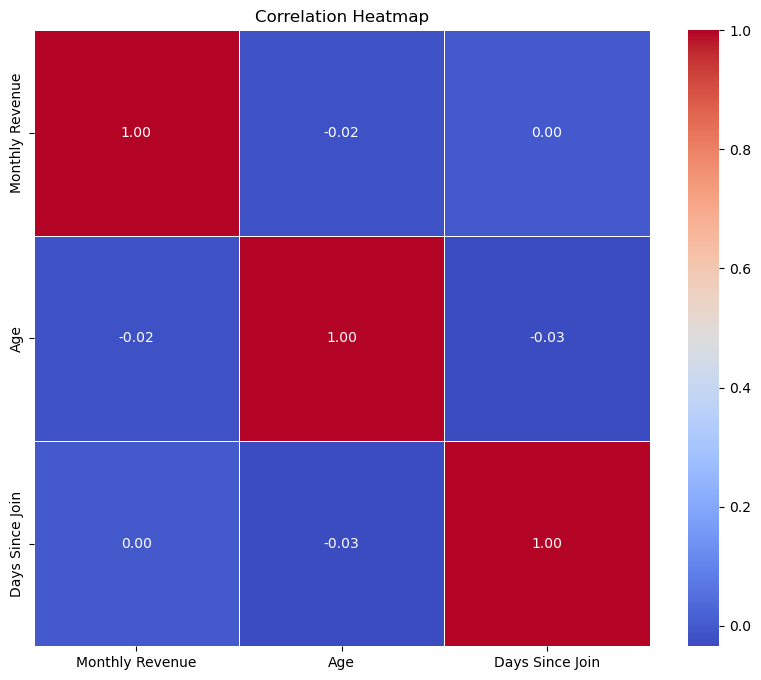

In [23]:
# Create Correlation heatmap

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap')

#### Observations of Heatmap
- The heatmap shows what the correlation matrix revealed:
- All the correlation coefficients are close to 0, indicating very weak or no linear relationships between the pairs of variables.
- None of the variables show a strong positive or negative correlation, so changes in one variable do not seem to predict changes in another.

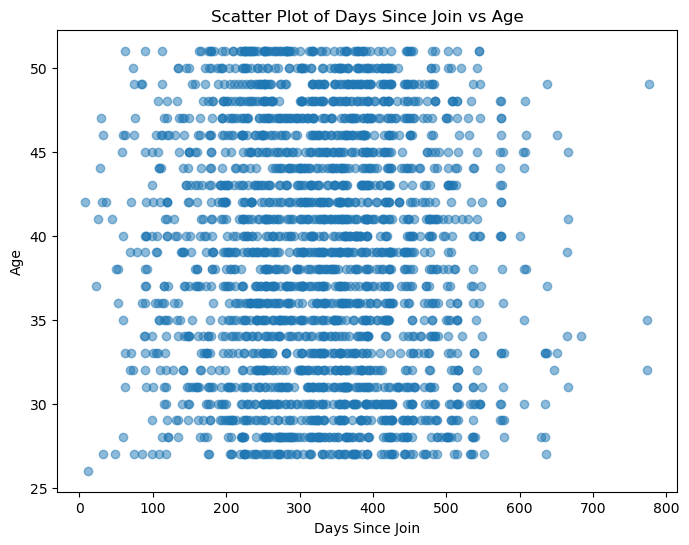

In [25]:

# Create scatterplot for 'Days Since Join' and 'Age' columns

plt.figure(figsize=(8, 6))
plt.scatter(df['Days Since Join'], df['Age'], alpha=0.5)

# Add labels and title
plt.title('Scatter Plot of Days Since Join vs Age')
plt.xlabel('Days Since Join')
plt.ylabel('Age')
plt.show()

**Observations of Scatterplot:**
- As expected, there is no clear linear relationship between Age and Days Since Join

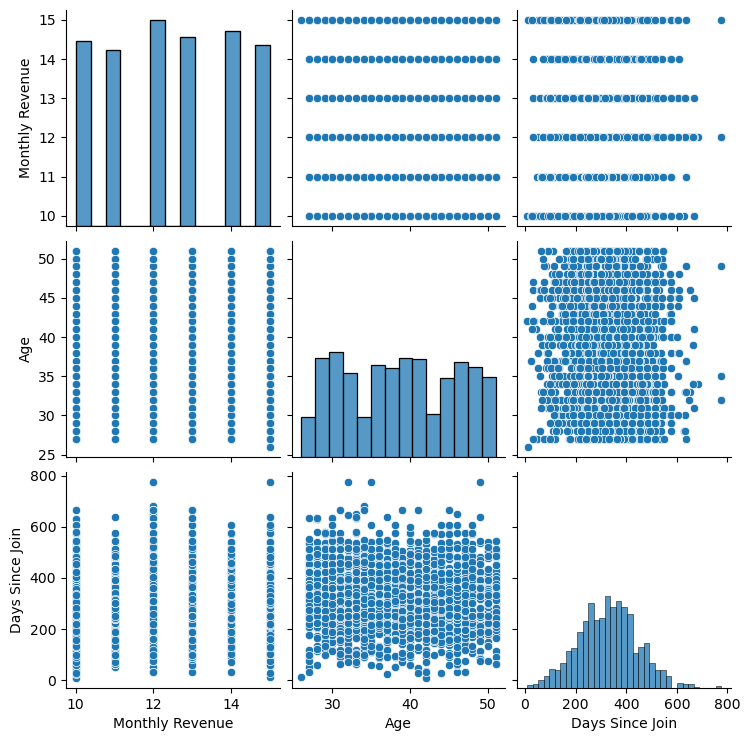

In [27]:
# Create a pair plot of the entire dataset
sns.pairplot(df)

# Show the plot
plt.show()

**Observations of Pair plot:**
- As expected, there does not seem to be much of a relationship between the variables.
- The Days since Join variable is normally distributed
- Monthly revenue and Age appear structured

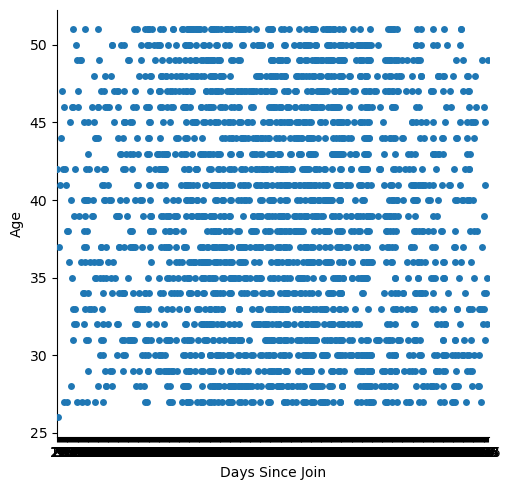

In [29]:
# Create a categorical plot (box plot) for Age and Days Since Join
sns.catplot(x='Days Since Join', y='Age', data=df)

# Show the plot
plt.show()

**Observations of Cat Plot:**
- As expected, there does not seem to be much of a relationship between the variables.
- May need to source additional data to continue project.
- Need data with more relationships to gather stronger insights

## 5. Exploring Relationships with Categorical Variables

In [32]:
# Importing dataset with columns derived in Excel
# Columns derived: 'Total Months' and 'Total Revenue'
# The 'Total Months' column takes the value from the 'Days Since Join' column and divides it by 30 to give an approximation of how many months the user has been subscribed
# The 'Total Revenue' column takes the value from the 'Total Months' column and multiplies it by the value in the 'Monthly Revenue' column to find an approximation of how much money has been paid in total from the subscriber


df_2=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'netflix_prepared_totalrev.csv')) 

In [33]:
df_2.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Days Since Join,Region,Total Months,Total Revenue
0,1,Basic,10.0,1/15/22,10/6/23,United States,28,Male,Smartphone,629,United States and Canada,21.0,209.67
1,2,Premium,15.0,5/9/21,6/22/23,Canada,35,Female,Tablet,774,United States and Canada,25.8,387.00
2,3,Standard,12.0,2/28/23,6/27/23,United Kingdom,42,Male,Smart TV,119,"Europe, Middle East, and Africa",4.0,47.60
3,4,Standard,12.0,10/7/22,6/26/23,Australia,51,Female,Laptop,262,Asia-Pacific,8.7,104.80
4,5,Basic,10.0,1/5/23,6/28/23,Germany,33,Male,Smartphone,174,"Europe, Middle East, and Africa",5.8,58.00


In [34]:
df_2.dtypes

User ID                int64
Subscription Type     object
Monthly Revenue      float64
Join Date             object
Last Payment Date     object
Country               object
Age                    int64
Gender                object
Device                object
Days Since Join        int64
Region                object
Total Months         float64
Total Revenue        float64
dtype: object

In [35]:
# Change 'User ID' column to string
df_2['User ID'] = df_2['User ID'].astype(str)

In [36]:
df_2.dtypes

User ID               object
Subscription Type     object
Monthly Revenue      float64
Join Date             object
Last Payment Date     object
Country               object
Age                    int64
Gender                object
Device                object
Days Since Join        int64
Region                object
Total Months         float64
Total Revenue        float64
dtype: object

In [37]:
df_2.describe()

,Monthly Revenue,Age,Days Since Join,Total Months,Total Revenue
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,12.508400,38.795600,327.393200,10.912360,136.507032
std,1.686851,7.171778,115.818714,3.860938,51.912581
min,10.000000,26.000000,8.000000,0.300000,2.670000
25%,11.000000,32.000000,249.000000,8.300000,101.150000
50%,12.000000,39.000000,330.000000,11.000000,132.600000
75%,14.000000,45.000000,402.000000,13.400000,169.870000
max,15.000000,51.000000,776.000000,25.900000,387.000000


In [38]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User ID            2500 non-null   object 
 1   Subscription Type  2500 non-null   object 
 2   Monthly Revenue    2500 non-null   float64
 3   Join Date          2500 non-null   object 
 4   Last Payment Date  2500 non-null   object 
 5   Country            2500 non-null   object 
 6   Age                2500 non-null   int64  
 7   Gender             2500 non-null   object 
 8   Device             2500 non-null   object 
 9   Days Since Join    2500 non-null   int64  
 10  Region             2500 non-null   object 
 11  Total Months       2500 non-null   float64
 12  Total Revenue      2500 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 254.0+ KB


In [39]:
df_2.shape

(2500, 13)

In [40]:
# Create crosstab to compare 'Regions' and 'Total Revenue' 

# Group by 'Region' and calculate the sum of 'Total Revenue' for each region
region_revenue_sum = df_2.groupby('Region')['Total Revenue'].sum().reset_index()

# Display the result
print(region_revenue_sum)

                            Region  Total Revenue
0                     Asia-Pacific       25621.64
1  Europe, Middle East, and Africa      161809.98
2                    Latin America       49307.10
3         United States and Canada      104528.86


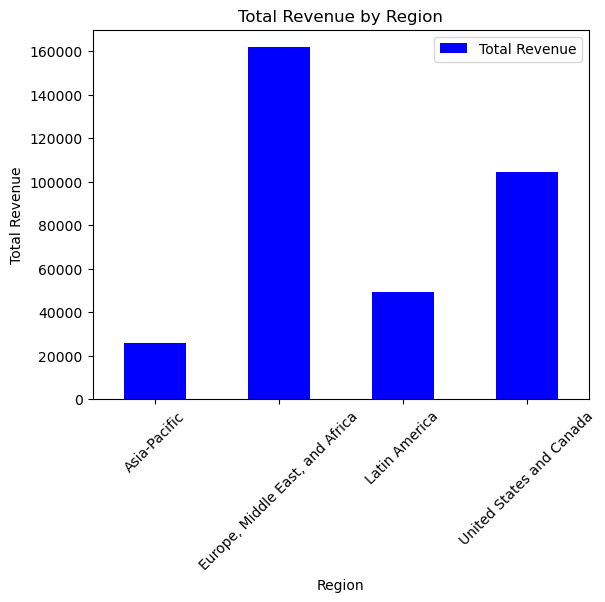

In [41]:
# Plot crosstab in bar chart

bar_region_revenue_sum = region_revenue_sum.plot.bar(x='Region', y='Total Revenue', color=['blue'])

# Label the axes
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

# Title

plt.title('Total Revenue by Region')

# Display the plot
plt.show()

In [42]:
# Export Chart 
# Preventing the labels from being cut off when saving the figure using bbox_inches='tight' 
bar_region_revenue_sum.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region_revenue_sum.png'), bbox_inches='tight')

**Observations:**
- Europe, Middle East and Africa region has the most total revenue
- US and Canada is second highest region in terms of revenue
- Latin America is third highest, but significantly lower than the leading two regions
- Asia-Pacific has the least total revenue

**New Questions to Explore:**
- Are the regions with highest revenue due to loyal subscribers, higher monthly subscription fee, more subscribers, or a combination?

In [45]:
# Create crosstab to compare 'Regions' and 'Days Since Join' 

# Group by 'Region' and calculate the average of 'Days Since Join' for each region
region_subscriber_loyalty_average = df_2.groupby('Region')['Days Since Join'].mean().reset_index()

# Display the result
print(region_subscriber_loyalty_average)

                            Region  Days Since Join
0                     Asia-Pacific       336.983607
1  Europe, Middle East, and Africa       326.562975
2                    Latin America       327.994536
3         United States and Canada       326.100260


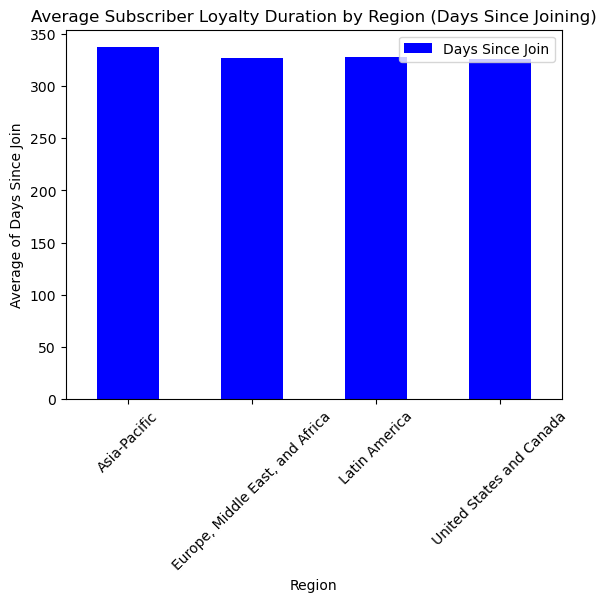

In [46]:
# Plot crosstab in bar chart

bar_region_subscriber_loyalty_average = region_subscriber_loyalty_average.plot.bar(x='Region', y='Days Since Join', color=['blue'])

# Label the axes
plt.xlabel('Region')
plt.ylabel('Average of Days Since Join')
plt.xticks(rotation=45)

# Title

plt.title('Average Subscriber Loyalty Duration by Region (Days Since Joining)')

# Display the plot
plt.show()

**Observations:**
- Based on this chart, there is not much different in the average for Days Since Join by Region
- The duration of subscriptions does not appear to be the reason why one region would have more revenue than another 

In [48]:
# Export Chart 
# Preventing the labels from being cut off when saving the figure using bbox_inches='tight' 
bar_region_subscriber_loyalty_average.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region_subscriber_loyalty_average.png'), bbox_inches='tight')

In [49]:
# Create crosstab to compare 'Regions' and 'User ID' 

# Group by 'Region' and count unique 'User ID's for each region
region_user_count = df_2.groupby('Region')['User ID'].nunique().reset_index()

# Rename the columns for clarity
region_user_count.columns = ['Region', 'Unique User Count']

# Display the result
print(region_user_count)

                            Region  Unique User Count
0                     Asia-Pacific                183
1  Europe, Middle East, and Africa               1183
2                    Latin America                366
3         United States and Canada                768


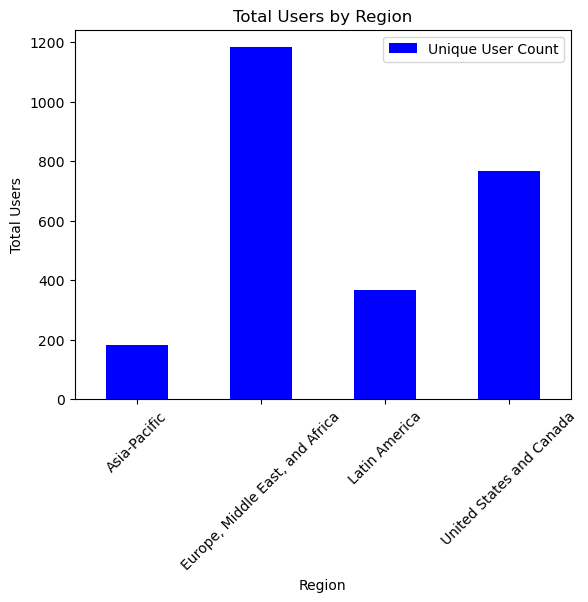

In [50]:
# Plot crosstab in bar chart

bar_region_user_count = region_user_count.plot.bar(x='Region', y='Unique User Count', color=['blue'])

# Label the axes
plt.xlabel('Region')
plt.ylabel('Total Users')
plt.xticks(rotation=45)

# Title
plt.title('Total Users by Region')

# Display the plot
plt.show()

In [51]:
# Export Chart 
# Preventing the labels from being cut off when saving the figure using bbox_inches='tight' 
bar_region_user_count.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region_user_count.png'), bbox_inches='tight')

**Observations:**
- The regions with the most users are the regions with the most revenue

In [53]:
# Create a subset of df_2 where 'Region' is 'Europe, Middle East, and Africa'
df_3 = df_2[df_2['Region'] == 'Europe, Middle East, and Africa']

# Display the first few rows of df_3 to verify
print(df_3.head())


  User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
2       3          Standard             12.0   2/28/23           6/27/23   
4       5             Basic             10.0    1/5/23           6/28/23   
5       6           Premium             15.0   3/18/22           6/27/23   
8       9          Standard             12.0  10/20/22           6/23/23   
9      10           Premium             15.0    1/7/23           6/22/23   

          Country  Age  Gender      Device  Days Since Join  \
2  United Kingdom   42    Male    Smart TV              119   
4         Germany   33    Male  Smartphone              174   
5          France   29  Female    Smart TV              466   
8           Spain   37    Male  Smartphone              246   
9           Italy   44  Female    Smart TV              166   

                            Region  Total Months  Total Revenue  
2  Europe, Middle East, and Africa           4.0           47.6  
4  Europe, Middle East, and Afri

In [54]:
# Group by 'Region' and count unique 'User ID's for each region
region_1_country_revenue = df_3.groupby('Country')['Total Revenue'].sum().reset_index()

# Rename the columns for clarity
region_1_country_revenue.columns = ['Country', 'Total Revenue']

# Display the result
print(region_1_country_revenue)

          Country  Total Revenue
0          France       25730.60
1         Germany       24663.12
2           Italy       24828.95
3           Spain       60715.98
4  United Kingdom       25871.33


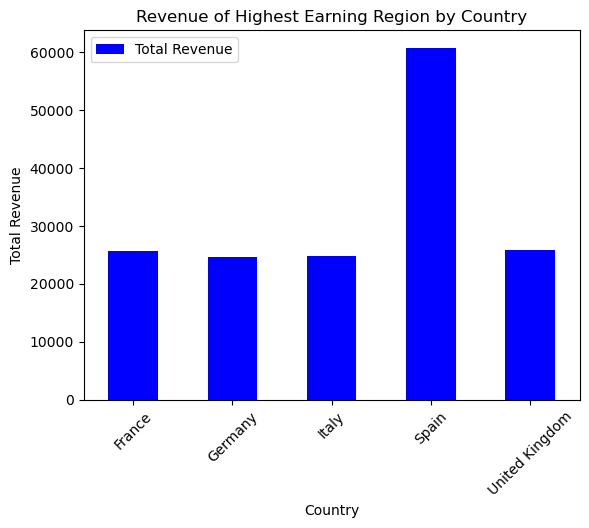

In [55]:
# Plot crosstab in bar chart

bar_region_1_country_revenue = region_1_country_revenue.plot.bar(x='Country', y='Total Revenue', color=['blue'])

# Label the axes
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

# Title
plt.title('Revenue of Highest Earning Region by Country')

# Display the plot
plt.show()

In [56]:
# Export Chart 
# Preventing the labels from being cut off when saving the figure using bbox_inches='tight' 
bar_region_1_country_revenue.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region_1_country_revenue.png'), bbox_inches='tight')

**Observations:**
- Based on this chart, within the highest earning region, Spain is the highest earning country
- The other countries in this region are all consistent based on earnings
- Spain is just about double the earnings in comparison to other countries in the region
- For clarity, this region can be renamed as 'Europe'

In [58]:
# Replace 'Europe, Middle East, and Africa' with 'Europe' in the 'Region' column of df_2
df_2['Region'] = df_2['Region'].replace('Europe, Middle East, and Africa', 'Europe')

# Display the unique values in the 'Region' column to verify the change
print(df_2['Region'].unique())

['United States and Canada' 'Europe' 'Asia-Pacific' 'Latin America']


In [59]:
#Export the updated df_2
#Exporting updated df
df_2.to_csv(os.path.join(path, '02 Data','Prepared Data', 'netflix_updated_regions.csv'))

In [101]:
# Exploring if monthly fee has any relationship with highest earning regions or countries

In [103]:
df_2.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Days Since Join,Region,Total Months,Total Revenue
0,1,Basic,10.0,1/15/22,10/6/23,United States,28,Male,Smartphone,629,United States and Canada,21.0,209.67
1,2,Premium,15.0,5/9/21,6/22/23,Canada,35,Female,Tablet,774,United States and Canada,25.8,387.00
2,3,Standard,12.0,2/28/23,6/27/23,United Kingdom,42,Male,Smart TV,119,Europe,4.0,47.60
3,4,Standard,12.0,10/7/22,6/26/23,Australia,51,Female,Laptop,262,Asia-Pacific,8.7,104.80
4,5,Basic,10.0,1/5/23,6/28/23,Germany,33,Male,Smartphone,174,Europe,5.8,58.00


In [105]:
# Renaming 'Monthly Revenue' column to 'Monthly Fee' for clarity
df_2=df_2.rename(columns={'Monthly Revenue': 'Monthly Fee'})

In [107]:
# Checking column
df_2.head()

,User ID,Subscription Type,Monthly Fee,Join Date,Last Payment Date,Country,Age,Gender,Device,Days Since Join,Region,Total Months,Total Revenue
0,1,Basic,10.0,1/15/22,10/6/23,United States,28,Male,Smartphone,629,United States and Canada,21.0,209.67
1,2,Premium,15.0,5/9/21,6/22/23,Canada,35,Female,Tablet,774,United States and Canada,25.8,387.00
2,3,Standard,12.0,2/28/23,6/27/23,United Kingdom,42,Male,Smart TV,119,Europe,4.0,47.60
3,4,Standard,12.0,10/7/22,6/26/23,Australia,51,Female,Laptop,262,Asia-Pacific,8.7,104.80
4,5,Basic,10.0,1/5/23,6/28/23,Germany,33,Male,Smartphone,174,Europe,5.8,58.00


In [109]:
# Create crosstab to compare 'Regions' and unique values in 'Monthly Fee'
Regions_monthly_fee_count = pd.crosstab(df_2['Region'], df_2['Monthly Fee'])

# Display the result
print(Regions_monthly_fee_count)


Monthly Fee               10.0  11.0  12.0  13.0  14.0  15.0
Region                                                      
Asia-Pacific                35    24    38    27    35    24
Europe                     179   197   202   189   214   202
Latin America               70    52    71    74    49    50
United States and Canada   125   115   144   128   133   123


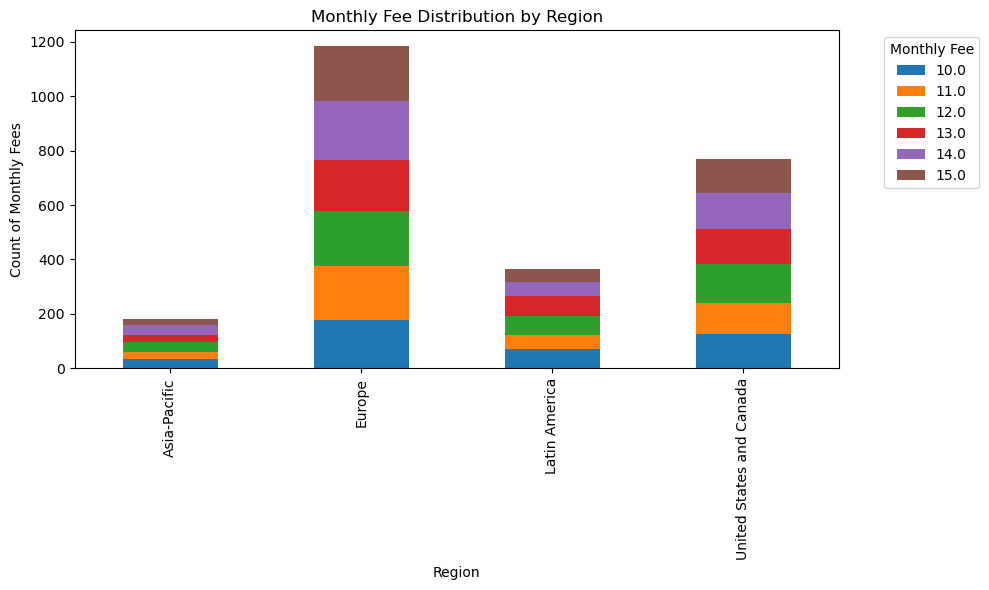

In [111]:
# Plotting the crosstab as a stacked bar chart
Regions_monthly_fee_count.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Monthly Fee Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count of Monthly Fees')
plt.legend(title='Monthly Fee', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

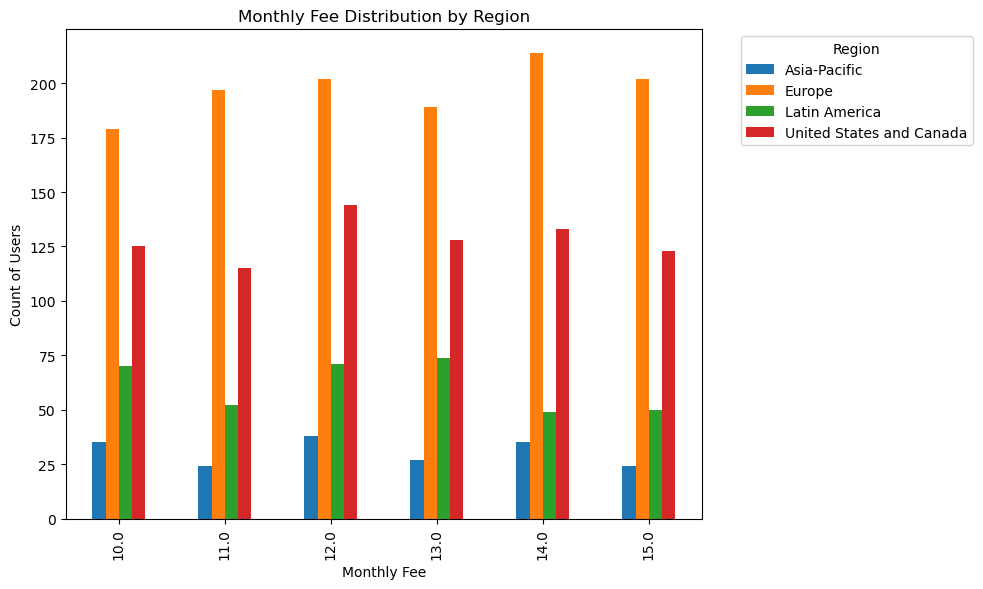

In [115]:
# Updating chart to place Monthly Fee on X-axis

Regions_monthly_fee_count = pd.crosstab(df_2['Region'], df_2['Monthly Fee'])

# Transpose the crosstab so 'Monthly Fee' is on the x-axis
Regions_monthly_fee_count = Regions_monthly_fee_count.T

# Plotting the crosstab as a grouped bar chart
Regions_monthly_fee_bar=Regions_monthly_fee_count.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.title('Monthly Fee Distribution by Region')
plt.xlabel('Monthly Fee')
plt.ylabel('Count of Users')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

In [117]:
# Exporting chart to project folder

Regions_monthly_fee_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Regions_monthly_fee_bar.png'), bbox_inches='tight')

In [127]:
# Create crosstab to count 'User ID' for each 'Monthly Fee' value
# Group by 'Monthly Fee' and count the unique 'User ID's for each fee
monthly_fee_count = df_2.groupby('Monthly Fee')['User ID'].count()

# Display the result
print(monthly_fee_count)

Monthly Fee
10.0    409
11.0    388
12.0    455
13.0    418
14.0    431
15.0    399
Name: User ID, dtype: int64


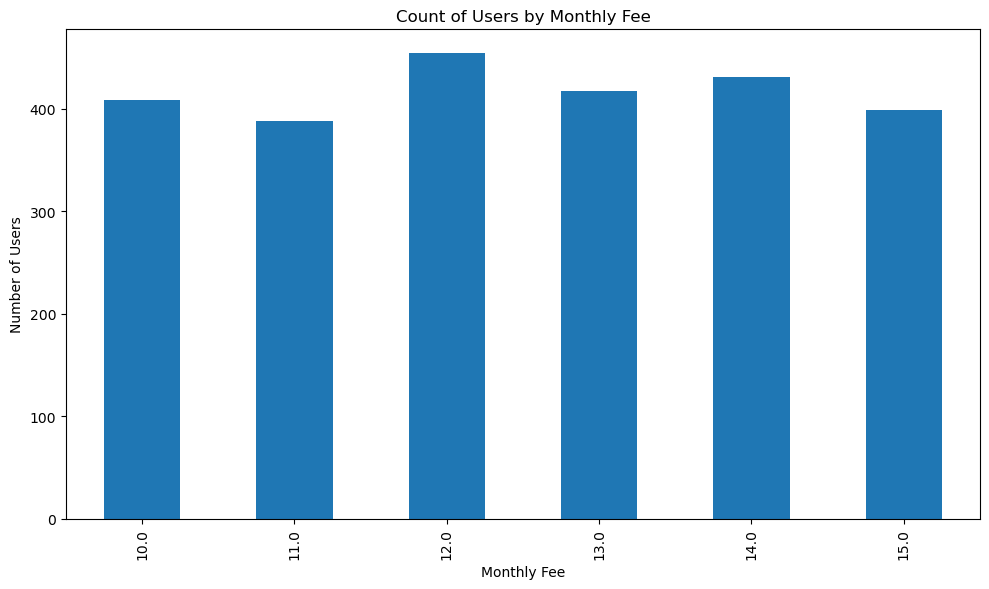

In [129]:
# Plotting the result in a bar chart
monthly_fee_count.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
monthly_fee_count_bar=plt.title('Count of Users by Monthly Fee')
plt.xlabel('Monthly Fee')
plt.ylabel('Number of Users')

# Display the plot
plt.tight_layout()
plt.show()

In [139]:
# Exporting chart to project folder

monthly_fee_count_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','monthly_fee_count_bar.png'), bbox_inches='tight')

In [141]:
# Printing Monthly fee and sum of Total Revenue

fee_rev_sum=df_2.groupby('Monthly Fee')['Total Revenue'].sum()
print(fee_rev_sum)

Monthly Fee
10.0    44633.20
11.0    45938.17
12.0    60767.60
13.0    59436.49
14.0    64629.12
15.0    65863.00
Name: Total Revenue, dtype: float64


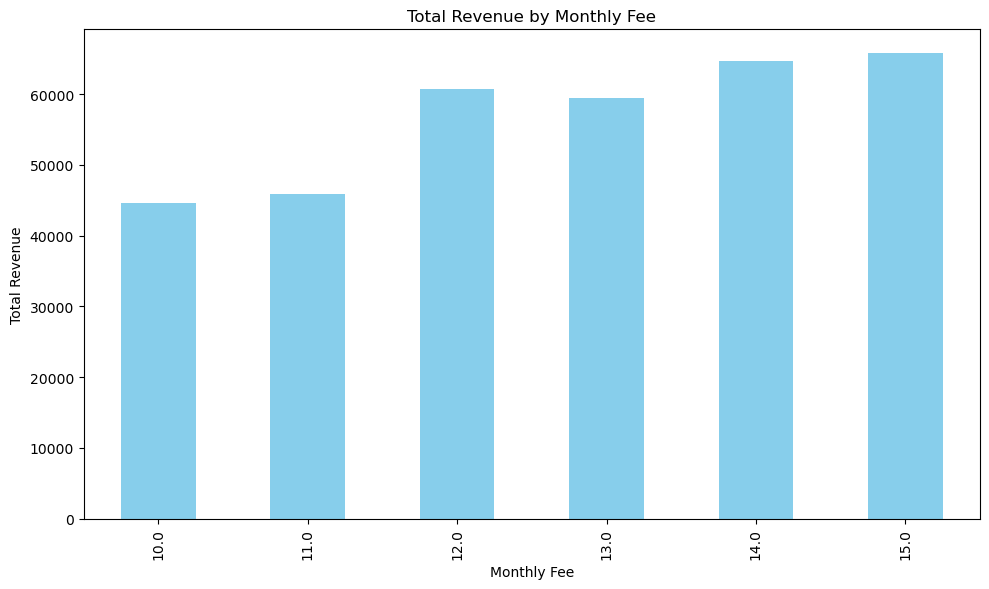

In [147]:
# Creating Chart
fee_rev_sum_bar=fee_rev_sum.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Revenue by Monthly Fee')
plt.xlabel('Monthly Fee')
plt.ylabel('Total Revenue')

# Display the plot
plt.tight_layout()
plt.show()

In [149]:
# Exporting Chart
fee_rev_sum_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','fee_rev_sum_bar.png'), bbox_inches='tight')

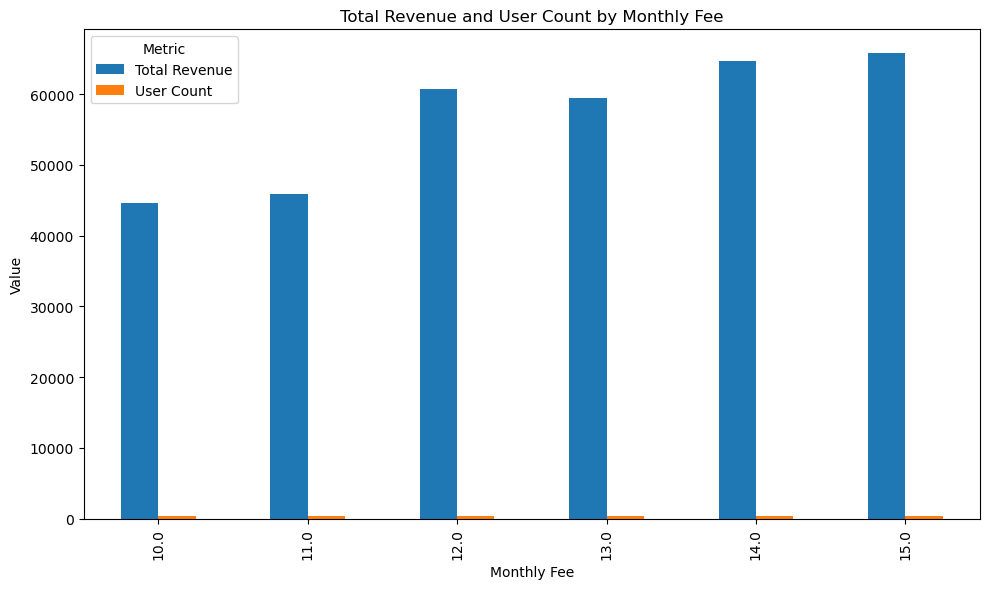

In [151]:
# Creating bar chart that shows both the sum of total revenue and the count of user IDs 

# Group by 'Monthly Fee' to get the sum of 'Total Revenue' and count of 'User ID'
fee_revenue_sum = df_2.groupby('Monthly Fee')['Total Revenue'].sum()
fee_user_count = df_2.groupby('Monthly Fee')['User ID'].count()

# Combine both Series into a DataFrame
combined_df = pd.DataFrame({
    'Total Revenue': fee_revenue_sum,
    'User Count': fee_user_count
})

# Plot the DataFrame as a grouped bar chart
fee_user_rev_bar = combined_df.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.title('Total Revenue and User Count by Monthly Fee')
plt.xlabel('Monthly Fee')
plt.ylabel('Value')
plt.legend(title='Metric')

# Display the plot
plt.tight_layout()
plt.show()

In [155]:
# Exporting Chart
fee_user_rev_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','fee_user_rev_bar.png'), bbox_inches='tight')

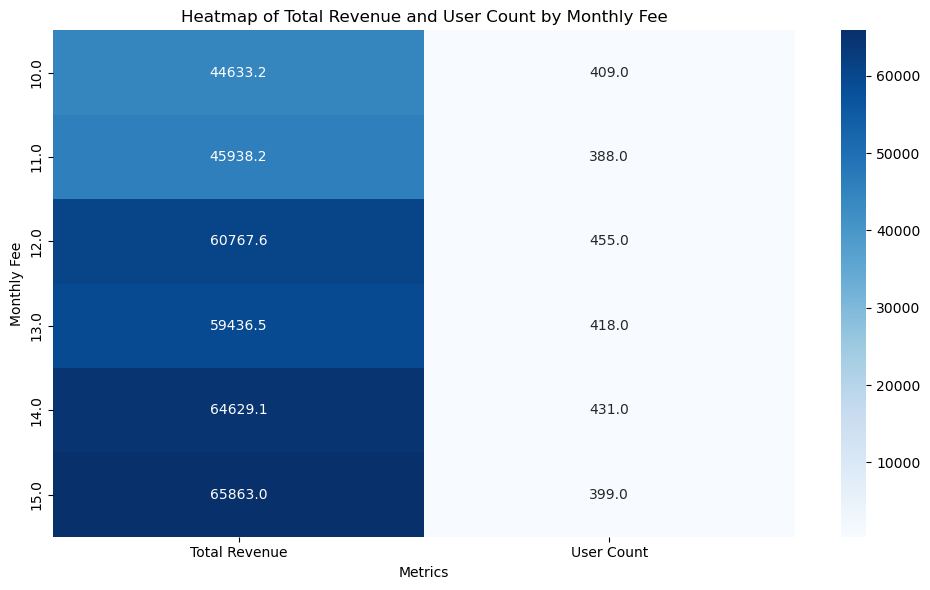

In [157]:
# Group by 'Monthly Fee' to get the sum of 'Total Revenue' and count of 'User ID'
fee_revenue_sum = df_2.groupby('Monthly Fee')['Total Revenue'].sum()
fee_user_count = df_2.groupby('Monthly Fee')['User ID'].count()

# Combine both Series into a DataFrame
combined_df = pd.DataFrame({
    'Total Revenue': fee_revenue_sum,
    'User Count': fee_user_count
})

# Create a heatmap
fee_rev_heatmap = plt.figure(figsize=(10, 6))
sns.heatmap(combined_df, annot=True, cmap='Blues', fmt=".1f")

# Adding labels and title
plt.title('Heatmap of Total Revenue and User Count by Monthly Fee')
plt.xlabel('Metrics')
plt.ylabel('Monthly Fee')

# Display the heatmap
plt.tight_layout()
plt.show()

In [159]:
# Exporting heatmap
fee_rev_heatmap.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','fee_rev_heatmap.png'), bbox_inches='tight')

In [165]:
# Recreating bar charts with correct label for 'Europe'

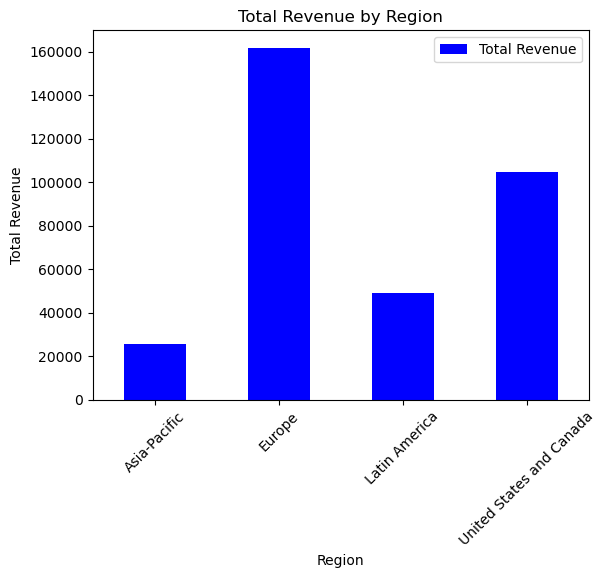

In [161]:
# Create crosstab to compare 'Regions' and 'Total Revenue' 

# Group by 'Region' and calculate the sum of 'Total Revenue' for each region
region_revenue_sum = df_2.groupby('Region')['Total Revenue'].sum().reset_index()

# Plot crosstab in bar chart
bar_region_revenue_sum = region_revenue_sum.plot.bar(x='Region', y='Total Revenue', color=['blue'])

# Label the axes
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

# Title

plt.title('Total Revenue by Region')

# Display the plot
plt.show()

In [163]:
# Export Chart 
# Preventing the labels from being cut off when saving the figure using bbox_inches='tight' 
bar_region_revenue_sum.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region_revenue_sum.png'), bbox_inches='tight')

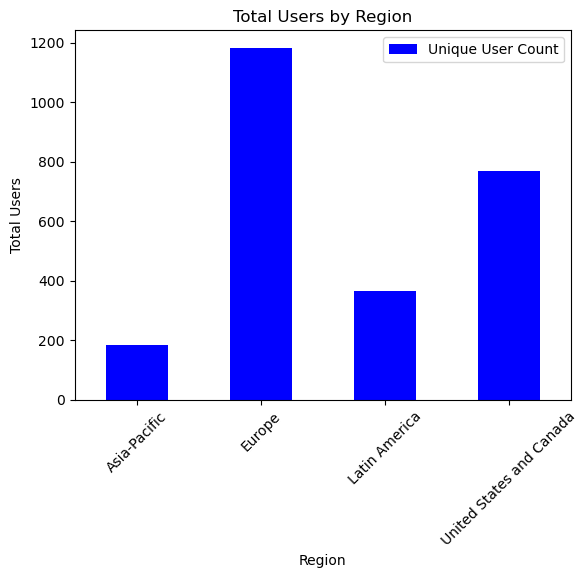

In [167]:
# Create crosstab to compare 'Regions' and 'User ID' 

# Group by 'Region' and count unique 'User ID's for each region
region_user_count = df_2.groupby('Region')['User ID'].nunique().reset_index()

# Rename the columns for clarity
region_user_count.columns = ['Region', 'Unique User Count']

# Plot crosstab in bar chart
bar_region_user_count = region_user_count.plot.bar(x='Region', y='Unique User Count', color=['blue'])

# Label the axes
plt.xlabel('Region')
plt.ylabel('Total Users')
plt.xticks(rotation=45)

# Title
plt.title('Total Users by Region')

# Display the plot
plt.show()


In [169]:
# Export Chart 
# Preventing the labels from being cut off when saving the figure using bbox_inches='tight' 
bar_region_user_count.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region_user_count.png'), bbox_inches='tight')

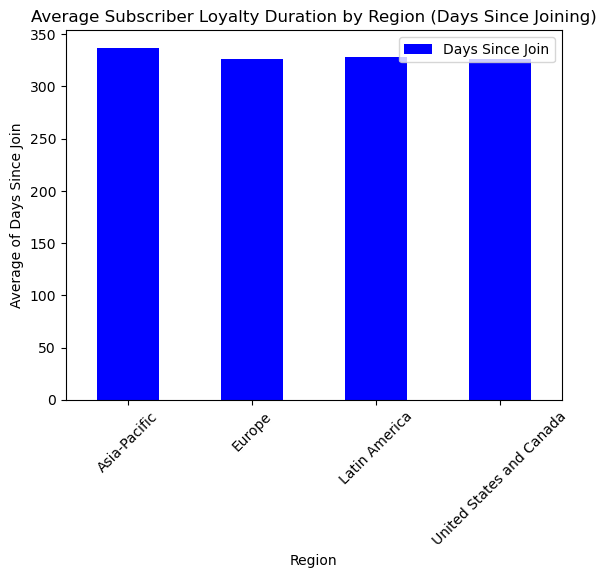

In [171]:
# Create crosstab to compare 'Regions' and 'Days Since Join' 

# Group by 'Region' and calculate the average of 'Days Since Join' for each region
region_subscriber_loyalty_average = df_2.groupby('Region')['Days Since Join'].mean().reset_index()

# Plot crosstab in bar chart
bar_region_subscriber_loyalty_average = region_subscriber_loyalty_average.plot.bar(x='Region', y='Days Since Join', color=['blue'])

# Label the axes
plt.xlabel('Region')
plt.ylabel('Average of Days Since Join')
plt.xticks(rotation=45)

# Title

plt.title('Average Subscriber Loyalty Duration by Region (Days Since Joining)')

# Display the plot
plt.show()

In [175]:
# Export Chart 
# Preventing the labels from being cut off when saving the figure using bbox_inches='tight' 
bar_region_subscriber_loyalty_average.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region_subscriber_loyalty_average.png'), bbox_inches='tight')

In [177]:
# Exploring if monthly fee impacts customer loyalty
# Group by 'Monthly Fee' and calculate the mean of 'Days Since Join'
loyalty_by_fee = df_2.groupby('Monthly Fee')['Days Since Join'].mean()

# Display the result
print(loyalty_by_fee)

Monthly Fee
10.0    327.383863
11.0    322.902062
12.0    333.887912
13.0    328.136364
14.0    321.324826
15.0    330.140351
Name: Days Since Join, dtype: float64


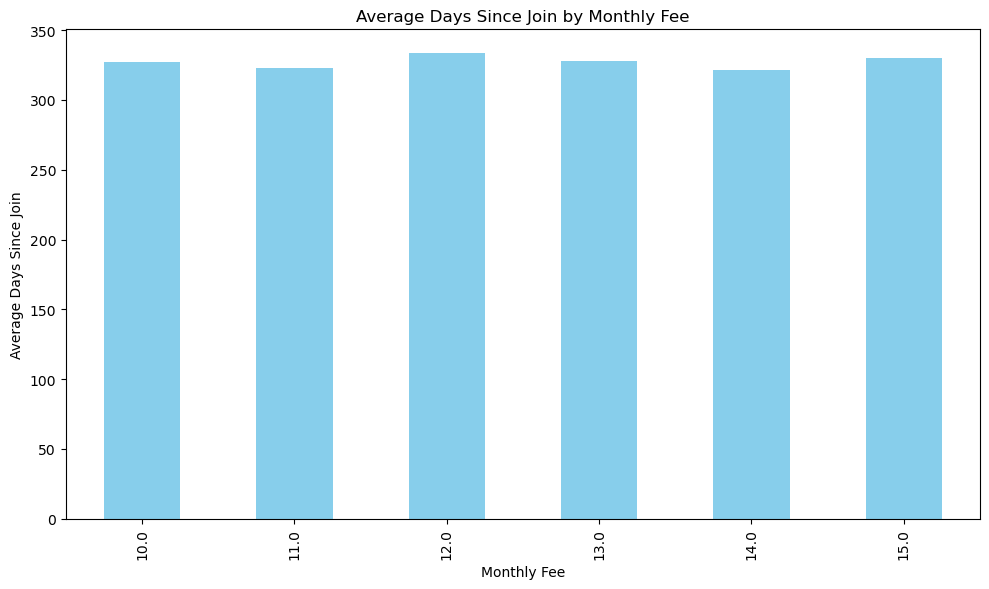

In [179]:
# Plotting the result in a bar chart
loyalty_by_fee_bar=loyalty_by_fee.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Adding labels and title
plt.title('Average Days Since Join by Monthly Fee')
plt.xlabel('Monthly Fee')
plt.ylabel('Average Days Since Join')

# Display the plot
plt.tight_layout()
plt.show()

In [183]:
# Export Chart 
# Preventing the labels from being cut off when saving the figure using bbox_inches='tight' 
loyalty_by_fee_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_by_fee_bar.png'), bbox_inches='tight')